In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#
# import the .. folder so we can import finx_option_pricer
#
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [16]:
import matplotlib.pyplot as plt

from finx_option_pricer.option import Option
from finx_option_pricer.option_plot import OptionsPlot, OptionPosition

In [8]:
spot_range = [65, 140]

oil_price = 102.67

# long 14d put
op1 = OptionPosition(
    quantity=1, 
    option=Option(S=oil_price, K=110, T=14/252, r=0.0, sigma=0.65, option_type='p'))

# short 7d call @ 95
op2 = OptionPosition(
    quantity=-1, 
    option=Option(S=oil_price, K=108, T=8/252, r=0.0, sigma=0.65, option_type='p'))

op_plot = OptionsPlot(
    option_positions=[
        op1, op2
    ], 
    spot_range=spot_range)

op_plot.describe_option_positions()

# increment 10 days, 1 day at a time
df = op_plot.gen_value_df_timeincrementing(10, 1)
df.set_index("strikes", inplace=True)

# set time incremeting columns
columns = [f"t{i}" for i, _ in enumerate(df.columns)]
columns[-1] = "tf"
df.columns = columns


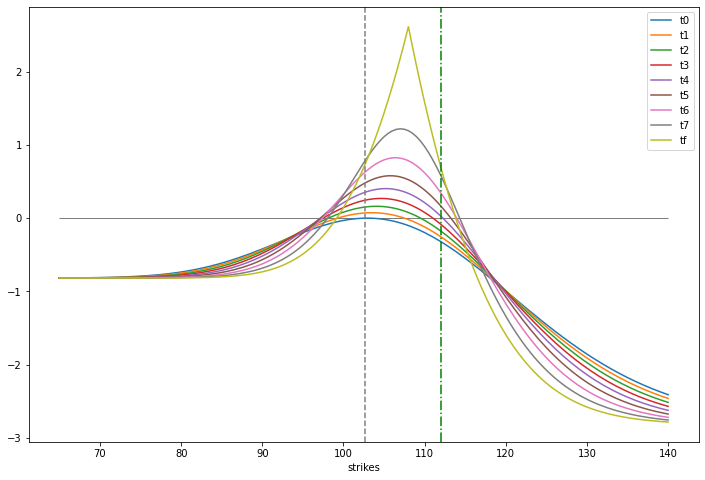

In [18]:
df.plot(figsize=(12, 8))
plt.hlines(0, spot_range[0], spot_range[1], color="black", linewidth=0.5)
plt.axvline(x=oil_price, color="grey", linestyle="--")
plt.axvline(x=112, color='green', linestyle="-.")
plt.savefig("../docs/complex_plot.png")